In [3]:
from google.colab import files
uploadtrain =  files.upload()

Saving label_training.txt to label_training.txt
Saving training.txt to training.txt


In [4]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(io.BytesIO(uploadtrain['training.txt']), sep = '\s+', header = None)
df.columns = ['Info_id', 'feature_id', 'value']
df.head()

,Info_id,feature_id,value
0,1,6,1.0
1,1,160,31.0
2,1,438,1.0
3,1,479,1.0
4,1,618,1.0


In [7]:
df1 = pd.read_csv(io.BytesIO(uploadtrain['label_training.txt']), header = None)
df1.columns = ['labels']
df1.head()

,labels
0,1
1,1
2,1
3,1
4,1


In [8]:
mat = pd.pivot_table(df, index = 'Info_id', columns = 'feature_id', values = 'value')
mat = mat.fillna(0)
mat.head()

feature_id,2,3,4,5,6,8,10,12,15,21,22,23,25,26,27,28,29,31,33,36,38,39,41,42,44,51,52,53,56,63,64,65,66,72,76,78,80,83,85,89,...,26299,26300,26302,26304,26305,26308,26309,26310,26312,26313,26315,26316,26318,26319,26320,26321,26322,26326,26327,26332,26334,26335,26336,26337,26338,26339,26340,26344,26348,26349,26350,26351,26352,26354,26355,26356,26357,26360,26362,26364
Info_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.decomposition import PCA
#mat1 = train.drop(['labels'], axis=1)
pca = PCA(n_components=100)
fit = pca.fit_transform(mat)
mat_df = pd.DataFrame(data = fit)

In [10]:
mat_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-34.286615,-12.721954,66.547243,38.600362,44.198061,-16.080071,30.154205,-7.114675,-25.047078,8.155958,36.013310,25.962917,32.911562,-5.543206,-0.758582,-6.420062,19.325942,5.741185,-45.049201,43.364403,-40.683237,-8.138507,9.140811,-24.692235,18.336739,68.765499,-7.986162,-23.684914,-39.059662,16.464650,0.919202,31.852778,-22.103665,-7.417009,20.573721,-4.419120,-3.562485,-36.411188,-60.857750,0.879319,...,-0.809358,-1.196189,0.128981,1.395374,-1.012215,-0.160134,-0.836523,0.123432,-0.178920,-0.713650,0.551748,-0.585154,0.851453,0.889104,-1.896346,0.243399,-0.101544,0.913249,0.492724,-1.080816,-0.058304,-0.382216,0.775990,1.158387,0.016326,-0.301462,-0.690240,-0.739923,-0.368371,1.258336,1.679474,0.600990,-0.056900,0.118913,-0.581882,-0.253908,-1.301284,-1.216739,0.666345,-0.262929
1,23.901116,-22.975198,-68.809828,-2.183722,14.823012,-38.260772,-32.259866,31.603368,28.485574,-17.838115,2.508111,-41.097644,23.641177,-16.739122,3.646941,53.515177,37.923851,-16.156619,0.789810,7.245697,9.532312,46.518038,43.819888,-57.830605,-4.061133,9.484703,-28.908007,23.975313,16.616407,24.173809,-37.510419,35.415749,-21.983527,-18.591174,30.861683,8.625289,0.040626,8.102063,18.702834,-8.226593,...,-0.967843,0.447878,-0.279374,0.860253,-0.438202,-0.099726,1.542299,2.508887,-0.808252,-1.649156,-0.459265,-0.169256,1.159866,-0.557762,-0.069041,0.014505,0.145845,0.343608,-0.224396,-0.120686,-0.464780,-0.709602,-0.376357,0.060460,0.578087,-0.814421,-0.384520,-0.425090,0.836443,-0.305358,-0.129940,-0.720185,-1.353069,0.908356,-1.278106,1.174812,-0.200760,-2.134275,-0.043512,-3.119126
2,16.071592,-32.588397,37.704559,53.023685,21.358713,-24.571468,-49.949174,-23.518261,-47.424870,-16.332495,83.105093,19.084792,-32.114304,-23.101705,1.052174,55.688575,-19.891466,-24.519777,-39.875351,29.746537,20.978377,-31.901999,-16.203814,-43.617110,39.286925,6.229675,-31.570592,5.353984,23.498689,14.432442,17.969991,29.306188,-37.988258,-4.284061,5.852345,-11.093709,1.273203,-12.002374,11.905219,19.342088,...,-0.390054,-0.080161,-0.550612,-1.886824,-0.601654,0.387647,1.932953,-0.484392,-0.072893,0.742142,-0.538472,0.496484,-1.315913,-0.205329,1.239234,0.194304,0.350341,-0.082130,-0.377107,0.681852,0.419608,0.727319,-0.610730,-0.994239,0.880010,0.118815,0.120837,-0.846665,0.192610,-0.382338,-0.152287,0.522958,-0.531927,0.577954,0.191460,0.207682,-0.807573,1.102477,0.633812,0.529753
3,7.736907,-25.975390,37.202887,-7.463795,24.550725,-20.133819,-2.003962,5.738670,16.987992,24.182175,-0.843551,5.424937,-56.353170,-7.178428,-23.243953,30.951218,3.137014,36.122407,-36.815911,5.033386,27.972731,-15.622470,-33.549515,-16.778337,4.996819,-17.291664,-27.395690,-14.564795,-5.320009,31.466921,0.481222,7.142111,-8.102668,-26.653859,-26.479365,-2.165070,23.334173,-3.876824,1.740165,52.353137,...,-0.415143,-0.174741,-0.398824,-0.701738,1.223554,-0.292998,-0.453322,0.265501,-1.385723,1.347807,1.774230,-0.100062,0.399218,-0.121918,0.373071,0.113580,0.245319,0.496815,-1.172099,0.649051,0.597939,0.125019,0.731406,0.335824,-1.220090,-1.152185,0.000143,-1.038949,0.177569,-0.091588,0.280062,0.146575,0.380208,0.423788,-0.588339,0.490442,0.242184,-0.179044,0.032116,0.836266
4,3.076045,-5.450483,-4.501322,-83.236003,-78.201476,-18.274651,-14.541837,26.240233,-2.269347,74.312457,25.970956,-4.632598,-6.532892,11.798272,34.648578,3.159208,17.775208,16.345217,-23.871294,-40.560748,-58.703020,21.061998,-33.578670,-1.802381,-24.204241,41.213498,21.116942,-43.481985,11.060396,2.628134,61.436101,39.089203,-2.715558,-24.492062,-14.058377,-41.607084,7.493554,22.782246,-29.662276,-11.818569,...,-1.150861,0.432088,-0.640117,-0.753401,-0.177165,-1.272044,1.197541,0.057259,1.002749,0.164103,-0.020900,-0.308162,-0.263462,-0.360405,-0.112647,-0.588181,-0.030535,0.5951

In [11]:
mat1 = pd.merge(mat_df, df1, left_index = True, right_index=True)
mat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,labels
0,-34.286615,-12.721954,66.547243,38.600362,44.198061,-16.080071,30.154205,-7.114675,-25.047078,8.155958,36.013310,25.962917,32.911562,-5.543206,-0.758582,-6.420062,19.325942,5.741185,-45.049201,43.364403,-40.683237,-8.138507,9.140811,-24.692235,18.336739,68.765499,-7.986162,-23.684914,-39.059662,16.464650,0.919202,31.852778,-22.103665,-7.417009,20.573721,-4.419120,-3.562485,-36.411188,-60.857750,0.879319,...,-1.196189,0.128981,1.395374,-1.012215,-0.160134,-0.836523,0.123432,-0.178920,-0.713650,0.551748,-0.585154,0.851453,0.889104,-1.896346,0.243399,-0.101544,0.913249,0.492724,-1.080816,-0.058304,-0.382216,0.775990,1.158387,0.016326,-0.301462,-0.690240,-0.739923,-0.368371,1.258336,1.679474,0.600990,-0.056900,0.118913,-0.581882,-0.253908,-1.301284,-1.216739,0.666345,-0.262929,1
1,23.901116,-22.975198,-68.809828,-2.183722,14.823012,-38.260772,-32.259866,31.603368,28.485574,-17.838115,2.508111,-41.097644,23.641177,-16.739122,3.646941,53.515177,37.923851,-16.156619,0.789810,7.245697,9.532312,46.518038,43.819888,-57.830605,-4.061133,9.484703,-28.908007,23.975313,16.616407,24.173809,-37.510419,35.415749,-21.983527,-18.591174,30.861683,8.625289,0.040626,8.102063,18.702834,-8.226593,...,0.447878,-0.279374,0.860253,-0.438202,-0.099726,1.542299,2.508887,-0.808252,-1.649156,-0.459265,-0.169256,1.159866,-0.557762,-0.069041,0.014505,0.145845,0.343608,-0.224396,-0.120686,-0.464780,-0.709602,-0.376357,0.060460,0.578087,-0.814421,-0.384520,-0.425090,0.836443,-0.305358,-0.129940,-0.720185,-1.353069,0.908356,-1.278106,1.174812,-0.200760,-2.134275,-0.043512,-3.119126,1
2,16.071592,-32.588397,37.704559,53.023685,21.358713,-24.571468,-49.949174,-23.518261,-47.424870,-16.332495,83.105093,19.084792,-32.114304,-23.101705,1.052174,55.688575,-19.891466,-24.519777,-39.875351,29.746537,20.978377,-31.901999,-16.203814,-43.617110,39.286925,6.229675,-31.570592,5.353984,23.498689,14.432442,17.969991,29.306188,-37.988258,-4.284061,5.852345,-11.093709,1.273203,-12.002374,11.905219,19.342088,...,-0.080161,-0.550612,-1.886824,-0.601654,0.387647,1.932953,-0.484392,-0.072893,0.742142,-0.538472,0.496484,-1.315913,-0.205329,1.239234,0.194304,0.350341,-0.082130,-0.377107,0.681852,0.419608,0.727319,-0.610730,-0.994239,0.880010,0.118815,0.120837,-0.846665,0.192610,-0.382338,-0.152287,0.522958,-0.531927,0.577954,0.191460,0.207682,-0.807573,1.102477,0.633812,0.529753,1
3,7.736907,-25.975390,37.202887,-7.463795,24.550725,-20.133819,-2.003962,5.738670,16.987992,24.182175,-0.843551,5.424937,-56.353170,-7.178428,-23.243953,30.951218,3.137014,36.122407,-36.815911,5.033386,27.972731,-15.622470,-33.549515,-16.778337,4.996819,-17.291664,-27.395690,-14.564795,-5.320009,31.466921,0.481222,7.142111,-8.102668,-26.653859,-26.479365,-2.165070,23.334173,-3.876824,1.740165,52.353137,...,-0.174741,-0.398824,-0.701738,1.223554,-0.292998,-0.453322,0.265501,-1.385723,1.347807,1.774230,-0.100062,0.399218,-0.121918,0.373071,0.113580,0.245319,0.496815,-1.172099,0.649051,0.597939,0.125019,0.731406,0.335824,-1.220090,-1.152185,0.000143,-1.038949,0.177569,-0.091588,0.280062,0.146575,0.380208,0.423788,-0.588339,0.490442,0.242184,-0.179044,0.032116,0.836266,1
4,3.076045,-5.450483,-4.501322,-83.236003,-78.201476,-18.274651,-14.541837,26.240233,-2.269347,74.312457,25.970956,-4.632598,-6.532892,11.798272,34.648578,3.159208,17.775208,16.345217,-23.871294,-40.560748,-58.703020,21.061998,-33.578670,-1.802381,-24.204241,41.213498,21.116942,-43.481985,11.060396,2.628134,61.436101,39.089203,-2.715558,-24.492062,-14.058377,-41.607084,7.493554,22.782246,-29.662276,-11.818569,...,0.432088,-0.640117,-0.753401,-0.177165,-1.272044,1.197541,0.057259,1.002749,0.164103,-0.020900,-0.308162,-0.263462,-0.360405,-0.112647,-0.588181,-0.030535,0.595189,-0.487462,0.618939,0.864831,0.01769

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(mat1, test_size=0.2)

In [13]:
X = train.drop(['labels'], axis=1)
X.values

array([[ 3.14686267e+01,  2.58206342e+01,  7.62866728e+01, ...,
        -5.74039362e-01,  7.14422812e-02, -6.34253986e-03],
       [-3.55474873e+01, -3.25695368e+01, -1.77166199e+01, ...,
         1.06455077e+00,  3.89284641e-02,  1.06965645e+00],
       [ 1.31027058e+01,  3.00436401e+01, -1.62085136e+01, ...,
         2.43785206e-01, -4.53908637e-01,  7.70777526e-02],
       ...,
       [-4.37296311e+01, -4.35557531e+01,  2.53374546e+01, ...,
         3.75543115e-02, -4.78984610e-02, -1.54812622e-01],
       [ 1.36522695e+01, -2.51649820e+01, -3.27194376e+01, ...,
        -5.09002734e-01,  2.25297137e-01,  3.46259300e-01],
       [-1.20617694e+00,  6.97210167e+00, -2.49443251e+00, ...,
         6.59129494e-01,  6.52106681e-01, -4.76487082e-01]])

In [14]:
Y=train['labels']
Y.head()

600    -1
1553    1
532     1
1171    1
27      1
Name: labels, dtype: int64

In [15]:
X1 = test.drop(['labels'], axis=1)
X1.values

array([[ 6.99385186e+01, -2.18983247e+01,  6.49454919e+01, ...,
         3.21067805e+00,  3.99135327e+00, -5.00779913e+00],
       [ 2.56210494e+01,  3.40688458e+00,  2.05001740e+01, ...,
         1.67332405e-02, -3.33670281e-01,  3.20945089e-01],
       [ 1.21915722e+01, -3.58828392e+01, -3.10825587e+01, ...,
         8.22725739e-02,  3.53279276e-01,  3.12545675e-01],
       ...,
       [ 2.73792818e+01, -9.77464229e+01,  8.87127324e+00, ...,
        -5.32828248e-01,  1.57096717e+00, -2.08826142e-01],
       [ 1.45090875e+01,  4.90162355e+01,  1.85170655e+01, ...,
        -7.95842196e-02,  5.11507251e-01,  2.95098877e-01],
       [ 2.41288294e+00,  1.27321396e+01,  4.50785777e+01, ...,
         4.06475653e-01,  4.67787164e-01,  4.66019117e-01]])

In [16]:
Y1 = test['labels']
Y1

1030   -1
1113   -1
440     1
551     1
1299   -1
       ..
380     1
782     1
59     -1
1319    1
358    -1
Name: labels, Length: 369, dtype: int64

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf = clf.fit(X, Y)

In [18]:
predY = clf.predict(X1)
predY

array([-1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1

In [0]:
predictions = pd.concat([pd.Series(Y1.values,name='Actual Class'),pd.Series(predY,name='Predicted Class')], axis=1)

In [20]:
predictions.tail()

,Actual Class,Predicted Class
364,1,1
365,1,1
366,-1,-1
367,1,-1
368,-1,-1


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions['Actual Class'], predictions['Predicted Class'])

0.8048780487804879

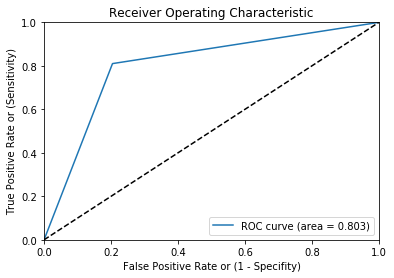

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr,tpr, thresholds = roc_curve(predictions['Actual Class'].values, predictions['Predicted Class'].values)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

0.9223968715012609

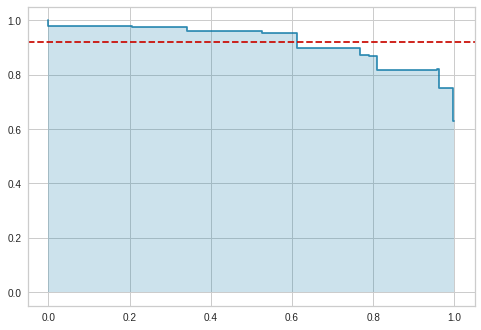

In [27]:
from yellowbrick.classifier import ClassPredictionError, ClassificationReport, ROCAUC, PrecisionRecallCurve, ConfusionMatrix
viz = PrecisionRecallCurve(clf)
viz.fit(X, Y)
viz.score(X1,Y1)

0.8048780487804879

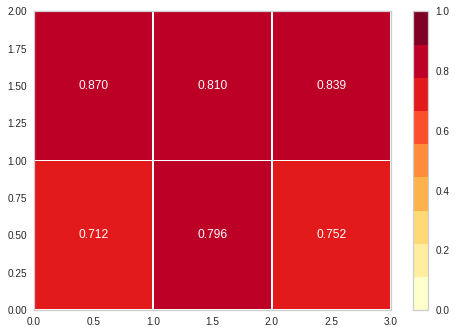

In [29]:
viz = ClassificationReport(clf)
viz.fit(X, Y)
viz.score(X1,Y1)